<a href="https://colab.research.google.com/github/Divine-Jude/Quantium-Virtual-Internship-Retail-Strategy-and-Analytics-/blob/main/Data_preparation_and_customer_analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Title: Quantium Virtual Internship - Retail Strategy and Analytics - Task 1

# Exploratory Data Analysis (EDA)

---



## Transaction Data

In [10]:
# #install required libraries
!pip install openpyxl

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [17]:
# import libraries
import openpyxl
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import re
import plotly.express as px


In this example, we loaded an Excel file called 'example.xlsx' using the openpyxl.load_workbook() function, selected the active worksheet using the workbook.active property, and printed the value of the cell A1 using the worksheet['A1'].value syntax.

In [64]:
# Load the workbook
workbook = openpyxl.load_workbook('/content/QVI_transaction_data.xlsx')

# Select the worksheet
worksheet = workbook.active


**Read Data**

We use pandas.read_excel() function to read the csv file

In [137]:
df = pd.read_excel('QVI_transaction_data.xlsx')

df.head(10)


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
5,43604,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild 300g,1,5.1
6,43601,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar 330g,1,5.7
7,43601,4,4196,3539,24,Grain Waves Sweet Chilli 210g,1,3.6
8,43332,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno 150g,1,3.9
9,43330,7,7150,6900,52,Grain Waves Sour Cream&Chives 210G,2,7.2


In [138]:
df.shape

(264836, 8)

In [139]:
df.info

<bound method DataFrame.info of          DATE  STORE_NBR  LYLTY_CARD_NBR  TXN_ID  PROD_NBR  \
0       43390          1            1000       1         5   
1       43599          1            1307     348        66   
2       43605          1            1343     383        61   
3       43329          2            2373     974        69   
4       43330          2            2426    1038       108   
...       ...        ...             ...     ...       ...   
264831  43533        272          272319  270088        89   
264832  43325        272          272358  270154        74   
264833  43410        272          272379  270187        51   
264834  43461        272          272379  270188        42   
264835  43365        272          272380  270189        74   

                                       PROD_NAME  PROD_QTY  TOT_SALES  
0         Natural Chip        Compny SeaSalt175g         2        6.0  
1                       CCs Nacho Cheese    175g         3        6.3  
2      

**Evaluating for Missing Data**

The output is a boolean value indicating whether the value that is passed into the argument is in fact missing data

In [140]:
missing_data = df.isnull()
missing_data.head(50)

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False


**Count missing values in each column**

In [141]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

DATE
False    264836
Name: DATE, dtype: int64

STORE_NBR
False    264836
Name: STORE_NBR, dtype: int64

LYLTY_CARD_NBR
False    264836
Name: LYLTY_CARD_NBR, dtype: int64

TXN_ID
False    264836
Name: TXN_ID, dtype: int64

PROD_NBR
False    264836
Name: PROD_NBR, dtype: int64

PROD_NAME
False    264836
Name: PROD_NAME, dtype: int64

PROD_QTY
False    264836
Name: PROD_QTY, dtype: int64

TOT_SALES
False    264836
Name: TOT_SALES, dtype: int64



**Correct data format**

Give columns a descriptive name


In [142]:
# rename columns
df = df.rename(
    columns={
        'DATE': 'Date',
        'STORE_NBR': 'store_number', 
        'LYLTY_CARD_NBR': 
        'loyalty_card_number', 
        'TXN_ID': 'transaction_ID',
        'PROD_NBR': 'product_number',
        'PROD_NAME': 'product_name',
        'PROD_QTY': 'product_quantity',
        'TOT_SALES': 'total_sales'
        }
    )

# print the updated dataframe
print(df)

         Date  store_number  loyalty_card_number  transaction_ID  \
0       43390             1                 1000               1   
1       43599             1                 1307             348   
2       43605             1                 1343             383   
3       43329             2                 2373             974   
4       43330             2                 2426            1038   
...       ...           ...                  ...             ...   
264831  43533           272               272319          270088   
264832  43325           272               272358          270154   
264833  43410           272               272379          270187   
264834  43461           272               272379          270188   
264835  43365           272               272380          270189   

        product_number                              product_name  \
0                    5    Natural Chip        Compny SeaSalt175g   
1                   66                  CCs Nac

Convert **Date** datatype

To convert the DATE column to datetime format

In [143]:
import datetime 

def Excel5DigitsDate_to_Date(FiveDigitsDate):
    """
    This function will convert the Excel Date consisting of five digits to yyyy-mm-dd format.
    """
    excel_anchor = datetime.datetime(1900, 1, 1)
    if(FiveDigitsDate < 60):
        delta_in_days = datetime.timedelta(days = (FiveDigitsDate - 1))
    else:
        delta_in_days = datetime.timedelta(days = (FiveDigitsDate - 2))
    converted_date = excel_anchor + delta_in_days
    return converted_date

# Convert DATE column to datetime format
df['Date'] = df['Date'].apply(Excel5DigitsDate_to_Date)

df['Date'].head()


0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: Date, dtype: datetime64[ns]

In [144]:
#Let's list the data types for each column
print(df.dtypes)



Date                   datetime64[ns]
store_number                    int64
loyalty_card_number             int64
transaction_ID                  int64
product_number                  int64
product_name                   object
product_quantity                int64
total_sales                   float64
dtype: object


Deriving pack size

We can extract the pack size information from the "product_name" column in the transaction data.

In [145]:
# extract pack size from product name
df['pack_size'] = df['product_name'].str.extract('(\d+)')

df['pack_size']


0         175
1         175
2         170
3         175
4         150
         ... 
264831    175
264832    175
264833    170
264834    150
264835    175
Name: pack_size, Length: 264836, dtype: object

The PACK_SIZE Column has a string data type and needs to be converted to numeric.


In [146]:
#convert data type
df['pack_size'] = pd.to_numeric(df['pack_size'])
df['pack_size'].dtypes

dtype('int64')

Deriving brand name

We can extract the brand name information from the "product_name" column in the transaction data.

In [147]:
df['product_name'].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Old El Paso Salsa   Dip Tomato Mild 300g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'K

In [148]:
# extract brand name from product name
df['brand_name'] = df['product_name'].str.split().str[0]

df['brand_name']



0          Natural
1              CCs
2           Smiths
3           Smiths
4           Kettle
            ...   
264831      Kettle
264832    Tostitos
264833     Doritos
264834     Doritos
264835    Tostitos
Name: brand_name, Length: 264836, dtype: object

In [149]:
#We need to rename some brands here as they have the same names.
df['brand_name'].replace('Natural', 'NCC', inplace = True)
df['brand_name'].replace('CCs', 'CCS', inplace = True)
df['brand_name'].replace('Smith', 'Smiths', inplace = True)
df['brand_name'].replace(['Grain', 'Grnwves'], 'Grainwaves', inplace = True)
df['brand_name'].replace('Dorito', 'Doritos', inplace = True)
df['brand_name'].replace('Ww', 'Woolworths', inplace = True)
df['brand_name'].replace('Infzns', 'Infuzions', inplace = True)
df['brand_name'].replace(['Red', 'Rrd'], 'Red Rock Deli', inplace = True)
df['brand_name'].replace('Snbts', 'Sunbites', inplace = True)

df['brand_name'].unique()

array(['NCC', 'CCS', 'Smiths', 'Kettle', 'Old', 'Grainwaves', 'Doritos',
       'Twisties', 'WW', 'Thins', 'Burger', 'Cheezels', 'Infuzions',
       'Red Rock Deli', 'Pringles', 'GrnWves', 'Tyrrells', 'Cobs',
       'Woolworths', 'French', 'RRD', 'Tostitos', 'Cheetos', 'Sunbites'],
      dtype=object)

In [150]:
def extract_text(text):
    
    """
    This function will basically extract the product name from the PROD_NAME column and remove the 
    special characters '&' and '/' in addition to the product weight
    """
    
    text = re.sub('\d\w*', ' ', text) # Remove product weights
    
    return text

    # Apply text cleaning function to PROD_NAME column
df['product_name'] = df['product_name'].apply(extract_text)
df.head(25)

,Date,store_number,loyalty_card_number,transaction_ID,product_number,product_name,product_quantity,total_sales,pack_size,brand_name
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt,2,6.0,175,NCC
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese,3,6.3,175,CCS
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken,2,2.9,170,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion,5,15.0,175,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili,3,13.8,150,Kettle
5,2019-05-19,4,4074,2982,57,Old El Paso Salsa Dip Tomato Mild,1,5.1,300,Old
6,2019-05-16,4,4149,3333,16,Smiths Crinkle Chips Salt & Vinegar,1,5.7,330,Smiths
7,2019-05-16,4,4196,3539,24,Grain Waves Sweet Chilli,1,3.6,210,Grainwaves
8,2018-08-20,5,5026,4525,42,Doritos Corn Chip Mexican Jalapeno,1,3.9,150,Doritos
9,2018-08-18,7,7150,6900,52,Grain Waves Sour Cream&Chives,2,7.2,210,Grainwaves


# Finding duplicates
In this section you will identify duplicate values in the dataset.

Find how many duplicate rows exist in the dataframe.

In [151]:
# your code goes here
df.duplicated().sum()

1

**Removing duplicates**

In [152]:
# your code goes here
df.drop_duplicates(inplace=True)

# your code goes here
df.duplicated().sum()

0

# Summary Statistics

Checking for inconsistencies and outliers

We will check for inconsistencies and outliers in the "product_quantity" and "total_sales" columns in the transaction data.

In [153]:
# check for inconsistencies and outliers in prod_qty column
print(f"check for inconsistencies and outliers in the product_quantity: \n{df['product_quantity'].describe()}")

# check for inconsistencies and outliers in tot_sales column
print(f"check for inconsistencies and outliers in the total_sales \n{df['total_sales'].describe()}")


check for inconsistencies and outliers in the product_quantity: 
count    264835.000000
mean          1.907308
std           0.643655
min           1.000000
25%           2.000000
50%           2.000000
75%           2.000000
max         200.000000
Name: product_quantity, dtype: float64
check for inconsistencies and outliers in the total_sales 
count    264835.000000
mean          7.304205
std           3.083231
min           1.500000
25%           5.400000
50%           7.400000
75%           9.200000
max         650.000000
Name: total_sales, dtype: float64


From the output, we can see that there are negative values in the "product_quantity" column. We will remove those negative values.

In [154]:
# Check for negative values in the product_quantity columns
print(df[df['product_quantity'] < 0])

# remove negative values in product_quantity  and total_sales columns
# transaction_data1 = df[df['product_quantity'] > 0]



Empty DataFrame
Columns: [Date, store_number, loyalty_card_number, transaction_ID, product_number, product_name, product_quantity, total_sales, pack_size, brand_name]
Index: []


**Finding correlation**

In [155]:
df.corr()

,store_number,loyalty_card_number,transaction_ID,product_number,product_quantity,total_sales,pack_size
store_number,1.000000,0.950869,0.997593,0.002309,0.005295,0.003234,0.000286
loyalty_card_number,0.950869,1.000000,0.954919,0.001755,0.003834,0.002908,0.000739
transaction_ID,0.997593,0.954919,1.000000,0.002544,0.005343,0.003468,0.000262
product_number,0.002309,0.001755,0.002544,1.000000,-0.004813,-0.133852,-0.230455
product_quantity,0.005295,0.003834,0.005343,-0.004813,1.000000,0.715308,0.008078
total_sales,0.003234,0.002908,0.003468,-0.133852,0.715308,1.000000,0.307967
pack_size,0.000286,0.000739,0.000262,-0.230455,0.008078,0.307967,1.000000


**Descriptive Statistical Analysis**

In [156]:
df.describe()

,store_number,loyalty_card_number,transaction_ID,product_number,product_quantity,total_sales,pack_size
count,264835.000000,2.648350e+05,2.648350e+05,264835.000000,264835.000000,264835.000000,264835.000000
mean,135.080216,1.355496e+05,1.351584e+05,56.583201,1.907308,7.304205,182.427032
std,76.784306,8.058011e+04,7.813316e+04,32.826692,0.643655,3.083231,64.327316
min,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000,70.000000
25%,70.000000,7.002100e+04,6.760100e+04,28.000000,2.000000,5.400000,150.000000
50%,130.000000,1.303580e+05,1.351380e+05,56.000000,2.000000,7.400000,170.000000
75%,203.000000,2.030945e+05,2.027015e+05,85.000000,2.000000,9.200000,175.000000
max,272.000000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000,380.000000


**Next, we need to explore the data and identify any patterns or trends. We can start by looking at the distribution of values in each column.**

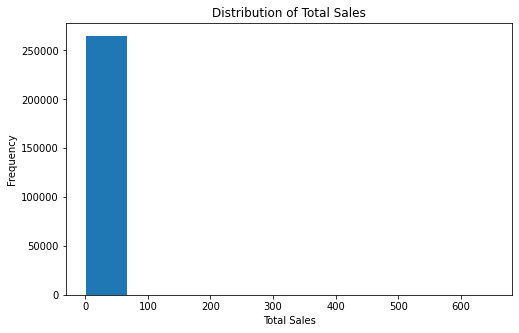

In [157]:
# Get the frequency distribution of values in each column
# Plot a histogram of total_sales column
df['total_sales'].plot(kind='hist', figsize=(8, 5))
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Total Sales')
plt.show()



What is the median of the column total_sales

In [158]:
df['total_sales'].median()

7.4

What is the mean of the column total_sales

In [159]:
df['total_sales'].mean()

7.3042045046916

In [160]:
df['total_sales'].describe()

count    264835.000000
mean          7.304205
std           3.083231
min           1.500000
25%           5.400000
50%           7.400000
75%           9.200000
max         650.000000
Name: total_sales, dtype: float64

We can also calculate some metrics to help describe the customers' purchasing behavior. For example, we can calculate the total sales for each customer.


In [161]:
# Calculate the total sales for each customer by Transaction
customer_sales = df.groupby('transaction_ID')['total_sales'].sum()

# Display the first 5 rows of the data
customer_sales.head(10)

transaction_ID
1     6.0
2     2.7
3     3.6
4     3.0
5     1.9
6     2.8
7     3.8
8     2.7
9     5.7
10    8.8
Name: total_sales, dtype: float64

We can also use a box plot to visualize the distribution of total_sales and identify any potential outliers:
**bold text**

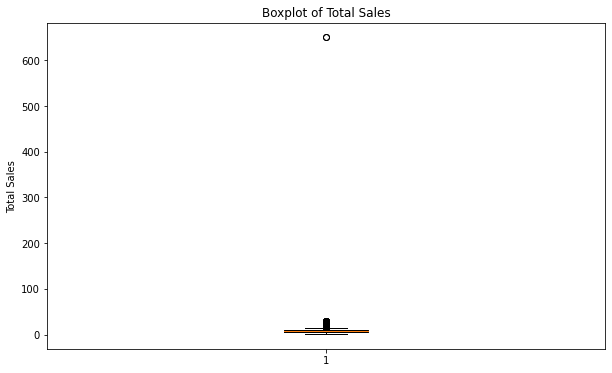

In [162]:

# create a larger figure
plt.figure(figsize=(10, 6))

# create boxplot of total_sales
plt.boxplot(df['total_sales'])

# add labels and title
plt.ylabel('Total Sales')
plt.title('Boxplot of Total Sales')

# display the plot
plt.show()



In [163]:
# your code goes here
print("Give the five number summary for the column total_sales:\n", df['total_sales'].describe())

df['total_sales'].dropna(axis=0, inplace=True)
Q1, Q3 = df['total_sales'].quantile(.25), df['total_sales'].quantile(.75)
IQR = Q3 - Q1
print('\nThe Inter Quartile Range for total sales:', IQR)

Give the five number summary for the column total_sales:
 count    264835.000000
mean          7.304205
std           3.083231
min           1.500000
25%           5.400000
50%           7.400000
75%           9.200000
max         650.000000
Name: total_sales, dtype: float64

The Inter Quartile Range for total sales: 3.799999999999999


Find out the upper and lower bounds.

In [164]:

# your code goes here
# your code goes here
upper = Q3 + (IQR * 1.5)
lower = Q1 - (IQR * 1.5)

print('Upper Bound:', upper)
print('Lower Bound:', lower)

Upper Bound: 14.899999999999999
Lower Bound: -0.29999999999999805


Identify how many outliers are there in the total_sales column.

In [168]:

# your code goes here

outliers = (df['total_sales'] < lower) | (df['total_sales'] > upper)

print("number of outliers: " + str(len(outliers)))

print("max outlier value: "+ str(outliers.max()))

print("min outlier value: "+ str(outliers.min()))

outliers

number of outliers: 264835
max outlier value: True
min outlier value: False


0         False
1         False
2         False
3          True
4         False
          ...  
264831    False
264832    False
264833    False
264834    False
264835    False
Name: total_sales, Length: 264835, dtype: bool

Create a new dataframe by removing the outliers from the df['total_sales'] column.


In [ ]:

df2 = [(df['total_sales'] < lower) | (df['total_sales'] > upper)]
df[df2] = np.nan
print(df2)

print("number of outliers: " + str(len(df2)))

Distribution
Determine how the data is distributed